In [368]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

# Genetating non-linear data

In [369]:
X = 6 * np.random.rand(200,1) - 3                       # generates (200,1) array of random value between -3 and 3
y = 0.8 * X**2 + 0.9 * X + 2 +  np.random.randn(200,1)  # np.random.randn(200,1) = noise

In [370]:
# print(X.ravel())
# print(y.ravel())

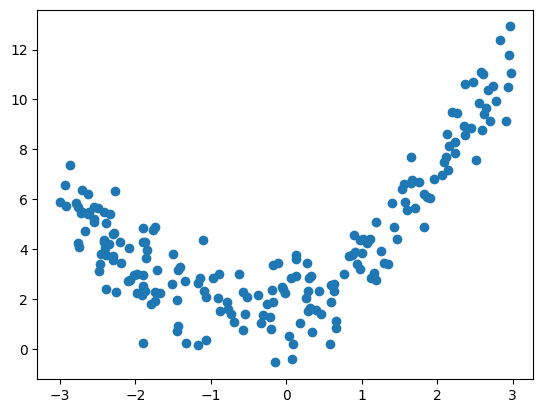

In [371]:
# plt.plot(X,y,'b.')
plt.scatter(X,y)

# Train Test Split <br>
- Features = 1
- Targets = 1
- No. of data (rows) = 160 + 40 = 200

In [372]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [373]:
# FEATURES = 1
# TARGETS = 1
# NO. OF DATA(ROWS) = 160 + 40
print(X_train.shape)
print(X_test.shape)

print(X_train[0])

(160, 1)
(40, 1)
[0.57668663]


# Linear reg model on non linear data

In [374]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)*100

24.103190800350315

# Plotting non-linear data and reg line

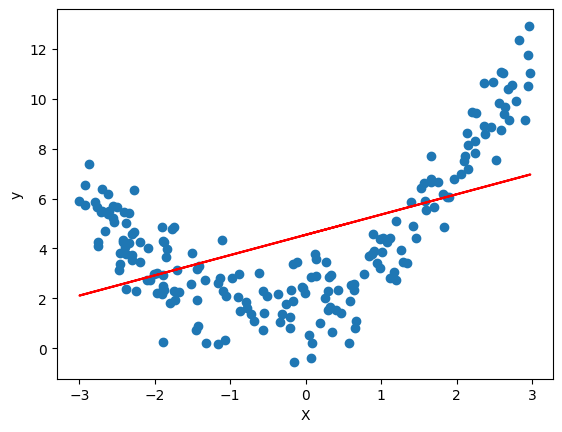

In [375]:
plt.scatter(X,y)
plt.plot(X_train, lr.predict(X_train), color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

# Transforming data to Polynomial 

In [376]:
# poly = PolynomialFeatures(degree=2, include_bias=True)
poly = PolynomialFeatures(degree=2)
X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.transform(X_test)

In [377]:
print(X_train[0])
print(X_train_transformed[0])

print(X_train.shape)
print(X_train_transformed.shape)

[0.57668663]
[1.         0.57668663 0.33256747]
(160, 1)
(160, 3)


In [378]:
lr = LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred= lr.predict(X_test_transformed)
r2_score(y_test,y_pred)*100

89.26281783542808

In [379]:
print(lr.intercept_)
print(lr.coef_)

print(y_pred.shape)
print(X_train.shape)

[1.86427981]
[[0.         0.92957048 0.81296641]]
(40, 1)
(160, 1)


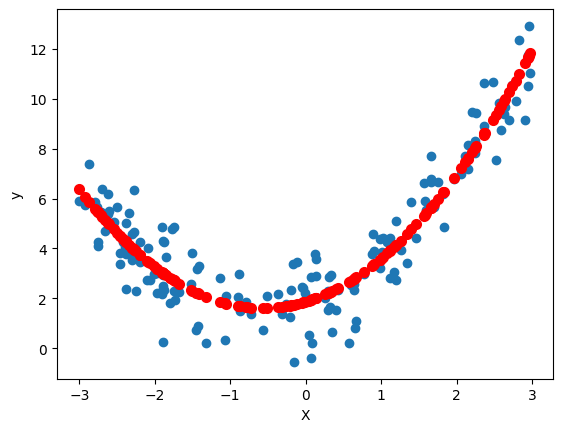

In [380]:
plt.scatter(X_train,y_train)
plt.scatter(X_train, lr.predict(X_train_transformed) ,linewidth=2, color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [381]:
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)
y_pred_new = lr.predict(X_new_poly)

In [382]:
X_new[0]
X_new_poly[0]

array([ 1., -3.,  9.])

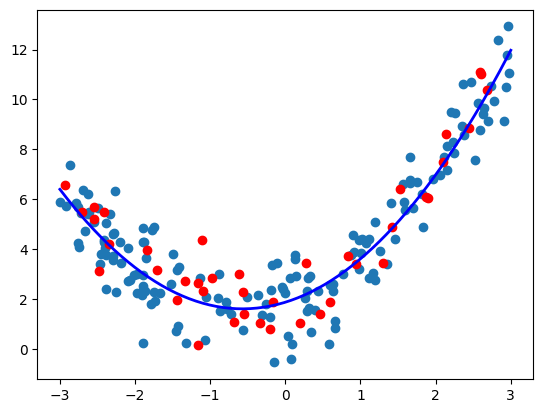

In [383]:
plt.plot(X_new,y_pred_new,linewidth=2,label='predictions',color='blue')
plt.scatter(X_train,y_train,label='training points')
plt.scatter(X_test,y_test,label='testing points',color='red')
